##Machine Learning

El aprendizaje automático consiste en una serie de técnicas que se basan en el principio general de aprendizaje: decimos que el sistema aprende si mejora su rendimiento en una tarea a partir de la experiencia.

Esta definición de aprendizaje incorpora 3 elementos básicos:

* La tarea que responde al objetivo que el agente busca alcanzar o el problema que se quiere solucionar. Por ejemplo, la tarea puede ser la clasificación de e-mails, el reconocimiento de imágenes, etc.
* El rendimiento que requiere de una medida cuantitativa para determinar qué tan bien resuelve la tarea nuestro sistema.
* La experiencia; es decir, aquel material que enriquecerá los conocimientos (estados de creencia) de nuestro agente. En este caso la experiencia refiere a los datos con los que aprendemos.

Determinar el conjunto de datos (experiencia) con el que se va a trabajar. Este conjunto de datos debe ser idealmente **representativo** del problema, sea este supervisado o no supervisado (o de otro tipo).

**¿Que significa que el conjunto de datos sea representativo?**

El conjunto de datos debe separarse en varios conjuntos:

* Datos de entrenamiento: Corresponden a aquellos datos con los que se aprenderá el modelo.
Generalmente se toma un 70% del conjunto de datos original para el entrenamiento.

* Datos de validación: Son datos que pueden servir para ajustar hiperparámetros. No siempre son necesarios.

* Datos de evaluación: Son los datos con los que se determinará el rendimiento del agente de aprendizaje. Es importante que los datos de evaluación no deben haber sido vistos por el agente previamente (durante el entrenamiento), pues de otra forma no podremos decir que el agente está aprendiendo (si no memorizando). Generalmente, se usa un 30% para los datos de evaluación.


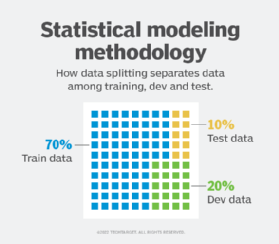


**Selección de los modelos:** Después de que tenemos el problema a tratar, podemos pasar a hacer una selección de un modelo para que resuelva este problema.

* Supervisados: Cuando tenemos un indicador de la clase que deseamos de salida.
* No-supervisados: Cuando sólo contamos con los datos del problema, pero no con una supervisión.

* Podemos hablar de otros tipos de aprendizaje; como el aprendizaje por refuerzo, donde el agente busca resolver una tarea con una función de recompensa; aprendizaje auto-supervisado donde el agente genera su propia supervisión; o aprendizaje semi-supervisado.**


**Entrenamiento del modelo:** Una vez que se cuenta con los datos y se ha seleccionado un modelo adecuado para el problema, se procederá a entrenar el modelo. Este proceso es lo que se puede llamar aprendizaje propiamente dicho, pues es aquí donde el agente, a partir de la observación de los datos, aprende a resolver el problema. En este paso se podrán seleccionar hiperparámetros (valores del modelo que son elegidos por el programador).

**Evaluación del modelo:** Este último paso es de suma importancia, pues determina la capacidad que el agente de aprendizaje tiene para generalizar. La evaluación del modelo consiste en determinar una medida numérica que nos indique qué tan bien el agente resuelve el problema para datos que no ha visto (de los que no ha aprendido). Según el tipo de problema se pueden utilizar diferentes métricas de evaluación.

## Regresión Lineal

La regresión lineal es un método de aprendizaje supervisado, donde dado un elemento de entrada

se busca aprender una función  

f
(
x
;
w
)
∈
R
  
  que estime valores reales para cada entrada **x**


Como su nombre lo dice, esta estimación la hace de manera lineal. Es decir, estima una recta, una función lineal.

Si los datos tienen una correlación lineal alta, la regresión lineal será un buen aproximador de estos valores.

Un ejemplo simple de regresión lineal con datos de la paquetería sklearn es aquel donde se describen casos médicos y su progresión de la enfermedad de diabetes. El objetivo es estimar la función que dada las medidas de un caso regrese la progresión de la enfermedad.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

Preparación de los datos
Realizaremos una regresión lineal sobre datos de ''Diabetes dataset'' que se encuentran disponibles a partir de la paquetería de sklearn. En este caso, el dataset está conformado por vectores en  R10.

Cada dimensión del vector de entrada  
x representa una variable que describe al caso en cuestión; algunas de las variables son la edad, el índice de masa corporal, la presión arterial, etc. Estas variables pueden revisarse a partir de la misma paquetería.

En primer lugar, cargamos el dataset. Para visualizar mejor el dataset, utilizamos la paquetería pandas, la cual nos permitirá visualizar datos tabulares de manera eficiente, así como realizar cálculos y estadísticas sobre estos datos.

In [5]:
#Carga dataset
data = load_diabetes()
#Visualiza variables
print(data.feature_names)

#Formato de pandas
table_data = pd.DataFrame(data.data, columns=data.feature_names)
#Agregamos la clase a la tabla
table_data['Y'] = data.target

#table_data

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
#Información del dataset
print(data.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

##Estadísticas y visualización de los datos
Una parte importante del aprendizaje automático es su relación con el análisis estadístico. Por tanto, antes de pasar a aplicar el algoritmo para estimación de la regresión lineal podemos computar algunas estadísticas.

Una de la más importantes en este caso, en tanto modelo lineal, es la correlación lineal. Con la tabla de pandas que hemos creado, podemos definir una correlación entre las variables. Ya que buscamos establecer una regresión lineal, los elementos que muestren una mayor correlación con la variable  **Y** (progresión de la enfermedad) serán los que nos servirán mejor.

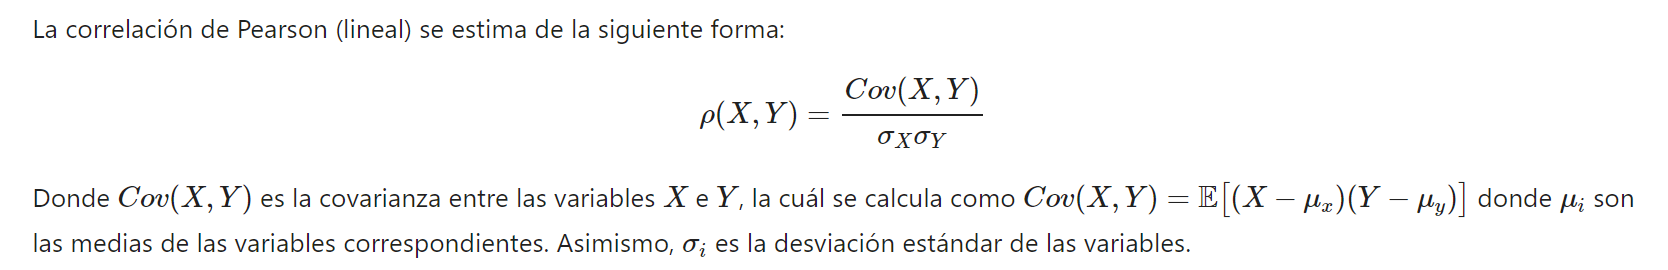

In [7]:
#Correlaciones lineales
table_data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Como podemos observar, la variable  BMI
  (índice de masa corporal) muestra una correlación positiva alta con la variable de salida Y
 ; por tanto, puede servirnos para realizar la correlación lineal.

De igual manera pudimos tomar la variable  s5
  (el nivel de triglicéridos), ya que también muestra una correlación positiva considerable. Tomaremos, entonces, esta variable como nuestra variable de entrada. Podemos visualizar entonces esta variable con respecto a la salida  Y para observar la correlación.

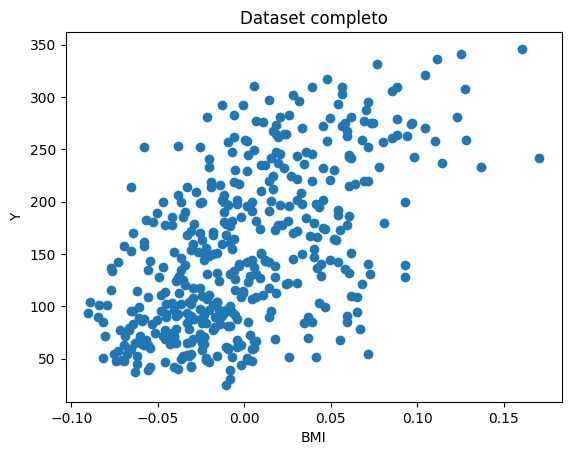

In [8]:
#Valores de X para BMI
X_BMI = table_data[['bmi']].to_numpy()
#Valores de salida Y
Y = data.target

#Visualización
plt.scatter(X_BMI, Y)
plt.title('Dataset completo')
plt.ylabel('Y')
plt.xlabel('BMI')
plt.show()

##Separación de los datos

Una parte importante en toda metodología de aprendizaje automático es la separación de los datos en entrenamiento y evaluación (otras veces también se usa evaluación, pero no es el caso). El esquema que usamos para separación de datos es 70-30; es decir, tomamos 70% para entrenamiento y 30% para evaluación.

Usamos la función train_test_split de la paquetería sklearn que separa los datos aleatoriamente. Hacer la separación de manera aleatoria es importante, pues si los datos están ordenados bajo ciertos criterios, estos criterios pueden introducir sesgos en nuestro aprendizaje.

In [9]:
#Separación de los datos
X_train, X_test, Y_train, Y_test = train_test_split(
    X_BMI, Y, test_size=0.3, random_state=123
)
#Número de datos
print('Datos de entrenamiento: {}\nDatos de evaluación: {}'.format(len(X_train), len(X_test)))

Datos de entrenamiento: 309
Datos de evaluación: 133


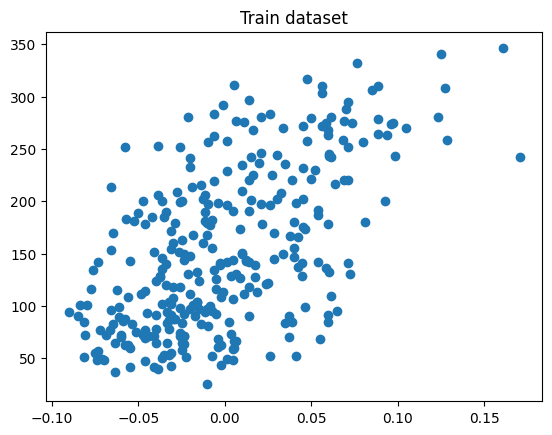

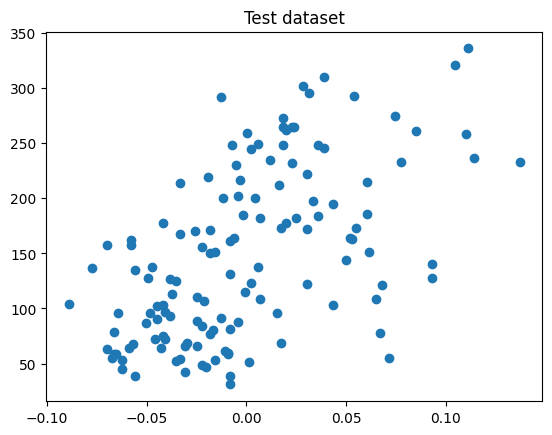

In [10]:
#Visualización datos de entrenamiento
plt.scatter(X_train,Y_train)
plt.title('Train dataset')
plt.show()

#Visualización datos de evaluación
plt.scatter(X_test,Y_test)
plt.title('Test dataset')
plt.show()

La regresión lineal, como ya lo señalamos, es un modelo de aprendizaje supervisado lineal que estima una función lineal debe ajustar los datos de entrenamiento, de tal forma que pueda predecir datos nuevo. El modelo de regresión lineal se divide en los siguientes módulos:

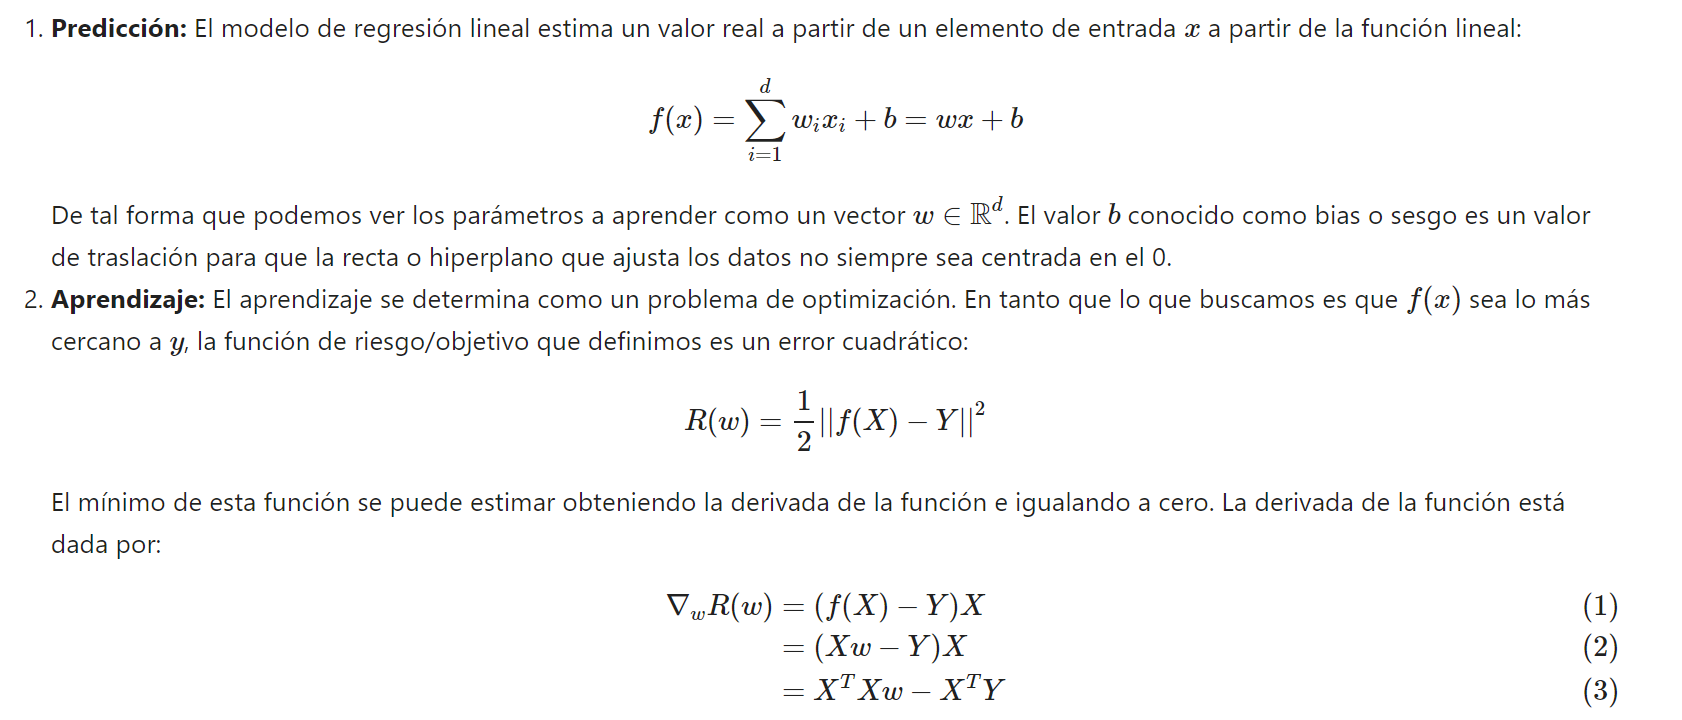



In [11]:
class LinearRegression(object):
    """Clase del modelo de regresión lineal"""
    def __init__(self):
        #Parámetros
        self.w = None
        self.b = None

    def predict(self, x):
        """Predicción del modelo"""
        f = np.dot(x,self.w) + self.b

        return f

    def fit(self, x,y):
        """Estimación de los parámetros"""
        #Se concatena una columna de 1's a X
        Xb = np.concatenate((x, np.ones((len(x),1))), axis=1)
        #XX^-1
        term1 = np.linalg.inv(np.dot(Xb.T,Xb))
        #XY
        term2 = np.dot(Xb.T,y)
        #Vector solución
        w = np.dot(term1,term2)
        #Guarda parámetros
        self.w = w[:-1]
        self.b = w[-1]

In [12]:
#Creación del modelo
model = LinearRegression()
#Entrenamiento del modelo
model.fit(X_train,Y_train)

print('Valor de w: {}\nValor de b: {}'.format(model.w, model.b))

Valor de w: [958.96106016]
Valor de b: 153.34795164225764


La recta que se ajusta los datos está definida por la función  
f
(
x
)
  que depende de w
 .


 Por tanto, podemos visualizar qué tanto esta recta se ajusta a los datos. En este caso, visualizamos tanto con los datos de entrenamiento como con los de evaluación, pero debe recordarse que la evaluación del modelo de regresión sólo debe realizarse sobre datos que no se vieron en el entrenamiento.

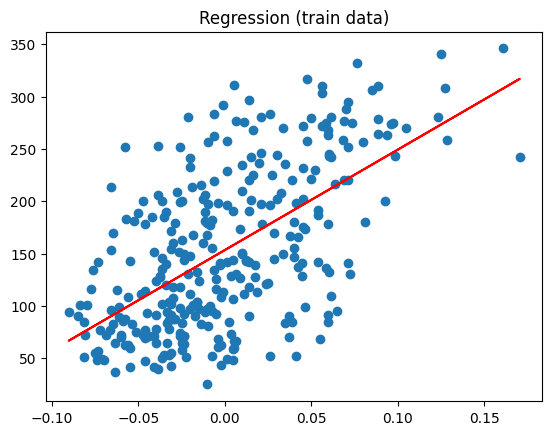

In [13]:
#Visualización en datos de entrenamiento
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='r')
plt.title('Regression (train data)')
plt.show()

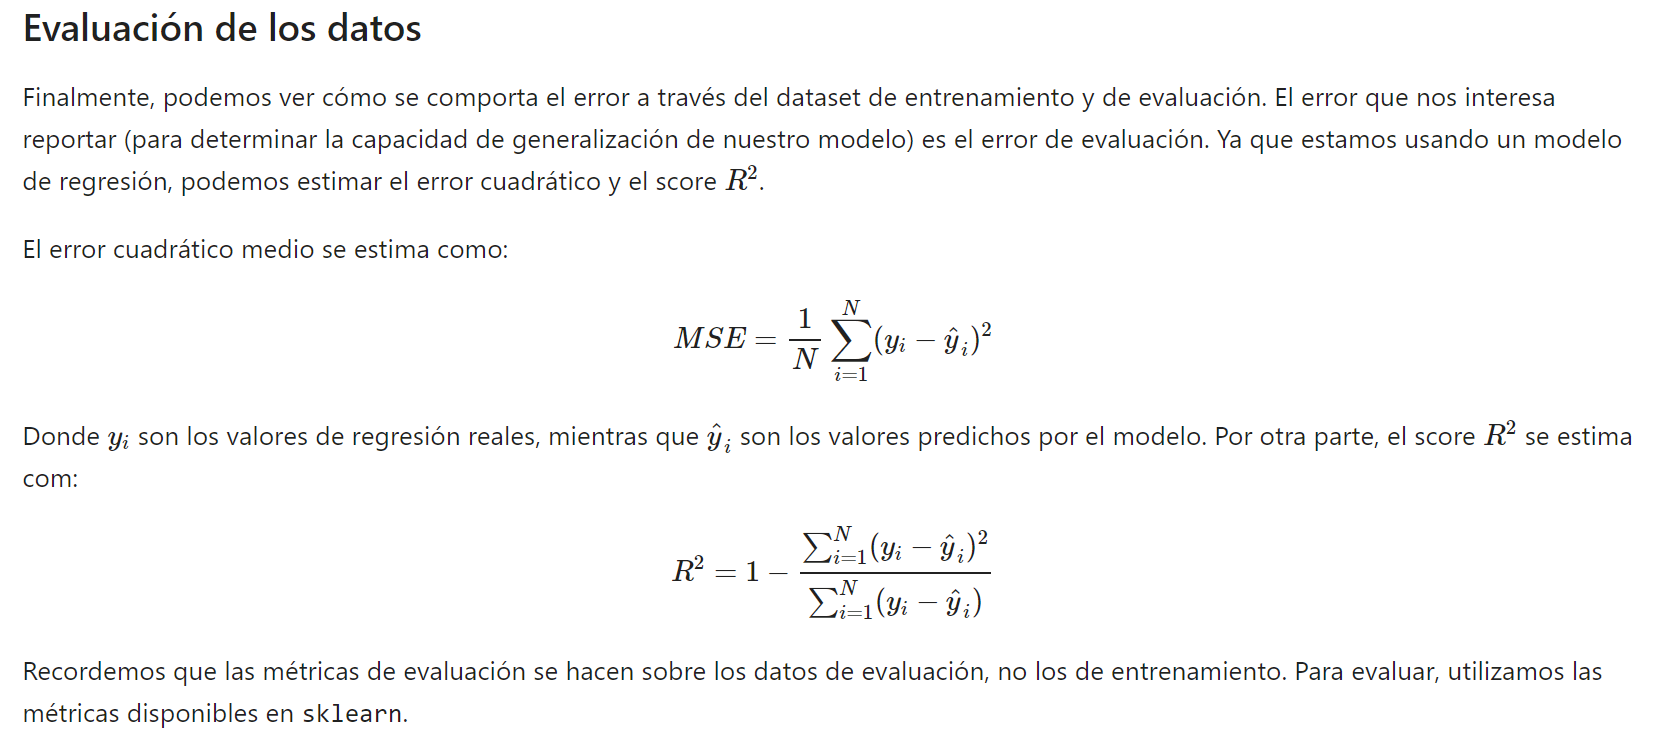

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

#Predicción sobre datos de evaluación
y_pred = model.predict(X_test)
#Obtención de métricas
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print('Error cuadrático medio: {}\nScore R2: {}'.format(mse,r2))

Error cuadrático medio: 4113.813814261837
Score R2: 0.3082201463223282


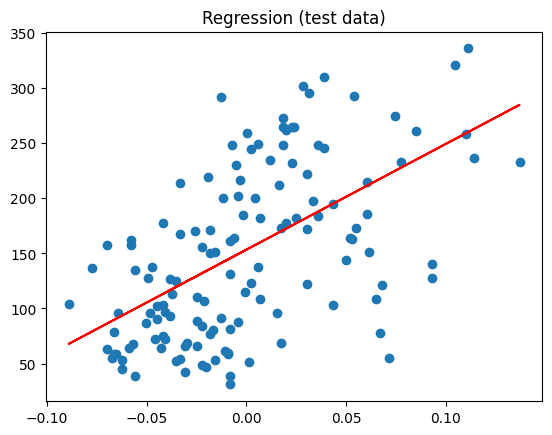

In [15]:
#Visualización en datos de evaluación
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='r')
plt.title('Regression (test data)')
plt.show()